In [39]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/somministrazioni-vaccini-latest.csv')
df.data_somministrazione = pd.to_datetime(df.data_somministrazione)

In [42]:
df.sort_values('data_somministrazione', inplace=True)

In [43]:
df.head()

,data_somministrazione,fornitore,area,fascia_anagrafica,sesso_maschile,sesso_femminile,categoria_operatori_sanitari_sociosanitari,categoria_personale_non_sanitario,categoria_ospiti_rsa,categoria_over80,prima_dose,seconda_dose
0,2020-12-27,Pfizer/BioNTech,ABR,20-29,1,0,1,0,0,0,1,0
95,2020-12-27,Pfizer/BioNTech,PIE,70-79,9,10,1,0,18,0,19,0
96,2020-12-27,Pfizer/BioNTech,PIE,80-89,5,19,0,0,24,0,24,0
97,2020-12-27,Pfizer/BioNTech,PIE,90+,5,15,0,0,20,0,20,0
98,2020-12-27,Pfizer/BioNTech,PUG,20-29,18,33,46,5,0,0,51,0


In [44]:
df.data_somministrazione = df.data_somministrazione.dt.strftime("%d-%m-%Y")

In [45]:
df_pivot = (df.groupby(['data_somministrazione','fascia_anagrafica'])['prima_dose','seconda_dose'].sum().reset_index(level=0).
 pivot(columns='data_somministrazione', values='prima_dose').fillna(0))
df_pivot

/Users/admin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


data_somministrazione,01-01-2021,02-01-2021,03-01-2021,04-01-2021,05-01-2021,06-01-2021,07-01-2021,08-01-2021,09-01-2021,10-01-2021,...,18-01-2021,19-01-2021,20-01-2021,21-01-2021,22-01-2021,27-12-2020,28-12-2020,29-12-2020,30-12-2020,31-12-2020
fascia_anagrafica,,,,,,,,,,,,,,,,,,,,,
16-19,3.0,20.0,5.0,20.0,49.0,49.0,40.0,53.0,84.0,155.0,...,54.0,36.0,24.0,19.0,6.0,0.0,0.0,0.0,2.0,23.0
20-29,944.0,3598.0,3526.0,6072.0,6878.0,6555.0,7829.0,8941.0,8813.0,7402.0,...,3199.0,2432.0,1789.0,1038.0,259.0,651.0,109.0,72.0,488.0,2333.0
30-39,1955.0,6897.0,6102.0,12120.0,13655.0,11152.0,15054.0,15052.0,13222.0,9842.0,...,4281.0,3328.0,2690.0,1503.0,335.0,1025.0,169.0,178.0,865.0,4209.0
40-49,2439.0,8507.0,7807.0,14707.0,16834.0,12932.0,19167.0,19386.0,16170.0,11451.0,...,5573.0,4159.0,3594.0,1847.0,427.0,1433.0,241.0,198.0,1209.0,5607.0
50-59,3209.0,10815.0,10087.0,19970.0,23032.0,17896.0,26558.0,26310.0,22189.0,15069.0,...,7289.0,5253.0,4511.0,2340.0,513.0,2112.0,287.0,281.0,1251.0,7000.0
60-69,1674.0,6453.0,5886.0,11727.0,13811.0,11755.0,15309.0,15360.0,16492.0,10587.0,...,4178.0,3216.0,2636.0,1453.0,342.0,1443.0,172.0,171.0,563.0,3476.0
70-79,183.0,580.0,518.0,1071.0,1497.0,1623.0,2206.0,2537.0,2885.0,2168.0,...,1780.0,1619.0,1407.0,827.0,164.0,128.0,0.0,8.0,84.0,538.0
80-89,279.0,777.0,595.0,1348.0,1824.0,1508.0,2916.0,2883.0,2817.0,1669.0,...,3815.0,3363.0,2709.0,1610.0,280.0,117.0,1.0,9.0,152.0,989.0
90+,325.0,724.0,531.0,1233.0,1706.0,1383.0,2630.0,2486.0,2266.0,1264.0,...,2614.0,2308.0,2007.0,1187.0,219.0,72.0,0.0,9.0,87.0,762.0


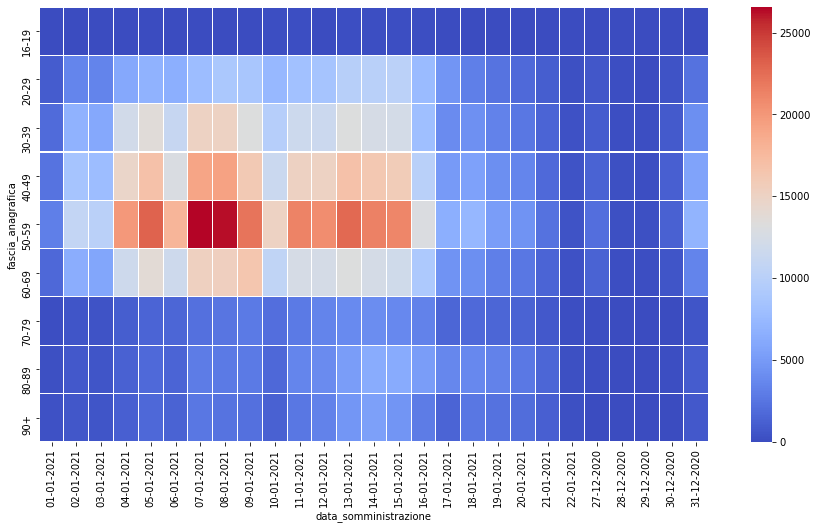

In [46]:

plt.figure(figsize=(15,8))
sns.heatmap(df_pivot, cmap='coolwarm', linecolor='white', linewidths=0.1)

In [51]:
daily = df.groupby('data_somministrazione')['prima_dose'].sum().reset_index()
df = df.merge(daily, left_on='data_somministrazione', right_on='data_somministrazione', how='inner', 
        suffixes=['','_totale_giorno'])

In [52]:
(df.prima_dose/df.prima_dose_totale_giorno).mul(100)

0       0.014325
1       0.272167
2       0.343790
3       0.286492
4       0.730554
          ...   
4154    0.864440
4155    0.000000
4156    0.039293
4157    0.078585
4158    0.000000
Length: 4159, dtype: float64